In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import tensorflow as tf
import keras
from keras import models, layers, regularizers, optimizers

from keras.datasets import cifar10

# load data from library
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'{X_train.shape[0]} train samples')
print(f'{X_test.shape[0]} test samples')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [3]:
# examine data in first sample with label
print(f'first sample:\n{X_train[0][0][:5]}\n...\n')
print(f'first label: {y_train[0]}')

first sample:
[[59 62 63]
 [43 46 45]
 [50 48 43]
 [68 54 42]
 [98 73 52]]
...

first label: [6]


In [4]:
# mapping of label to names
target_names={
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"}

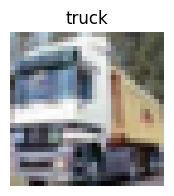

In [5]:
# plot single image sample from data set
def show_sample(sample=X_train[0], label=6):
    data = sample

    # set plot parameters
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.title(target_names[label])

    # Use imshow to plot pixels
    plt.imshow(data)

    # Display the plot
    plt.show()


show_sample(X_train[1], y_train[1][0])

12 sample count


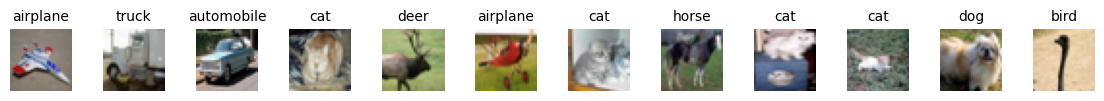

In [6]:
# plot multiple images from cifar10 dataset as subplots
def show_multi(samples=X_train[0:8], labels=[6,9,9,4,1,1,2,7], pred_labels=None):
    length = len(samples)

    # create horizontal figure with subplots
    fig, axes = plt.subplots(1, length, figsize=(14,8))
    axes = axes.flatten()

    # create subplot for each image data
    for i in range(length):
        data = samples[i]
        label = labels[i]

        # plot parameters
        plt.subplot(1, length, i+1)    
        plt.axis('off')
        
        if pred_labels is not None: 
            plt.title(f'True: {target_names[labels[i]]}\nPred: {target_names[pred_labels[i]]}',
            fontsize=10)
        else:
            plt.title(target_names[labels[i]], 
            fontsize=10)
        plt.subplots_adjust(wspace=0.5)
        plt.imshow(samples[i])
    
    # display sample count and show plot    
    print(f'{length} sample count')
    plt.show()

show_multi(X_train[30:42], [y[0] for y in y_train[30:42]])

In [7]:
from sklearn.model_selection import train_test_split

# split into validation data and partial training data
# stratify=y_train to ensure even porportion of split labels
x_partial, x_val, y_partial, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=2, stratify=y_train)

print(x_partial.shape[0], 'train samples')
print(x_val.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

40000 train samples
10000 validation samples
10000 test samples


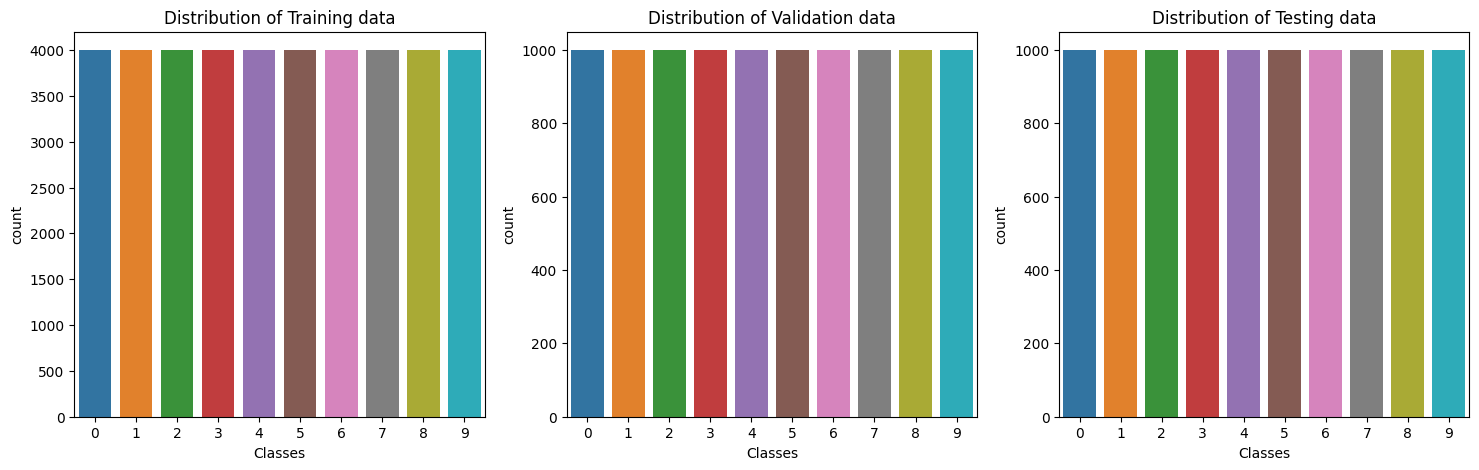

In [8]:
# show distribution of samples by countplot

fig, axs = plt.subplots(1,3,figsize=(18,5)) 
# plot for training set
sns.countplot(x=y_partial.ravel(), ax=axs[0])
axs[0].set_title('Distribution of Training data')
axs[0].set_xlabel('Classes')

# plot for validation set
sns.countplot(x=y_val.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Validation data')
axs[1].set_xlabel('Classes')

# plot for testing set
sns.countplot(x=y_test.ravel(), ax=axs[2])
axs[2].set_title('Distribution of Testing data')
axs[2].set_xlabel('Classes')
plt.show()

In [9]:
# from tensorflow.keras.utils import to_categorical

# preprocess data, normalize range to [0,1]
def prep_normalize(data):
    data = data.astype('float32') / 255
    return data

# one-hot encode integer label data to categorical
def prep_encoder(data, classes=10):
    data = tf.keras.utils.to_categorical(
        data, num_classes=classes, dtype='float32'
    )
    return data

In [10]:
# normalize samples
x_partial = prep_normalize(x_partial)
x_val = prep_normalize(x_val)
x_test = prep_normalize(X_test)

# one-hot encode labels
y_partial = prep_encoder(y_partial)
y_val = prep_encoder(y_val)

y_test = y_test.ravel()

print(x_partial)
print(y_partial)

[[[[0.44705883 0.72156864 0.8509804 ]
   [0.4392157  0.70980394 0.8392157 ]
   [0.44313726 0.70980394 0.8392157 ]
   ...
   [0.4392157  0.7019608  0.84313726]
   [0.43529412 0.7019608  0.84313726]
   [0.43529412 0.7058824  0.84313726]]

  [[0.44705883 0.72156864 0.84705883]
   [0.4392157  0.70980394 0.8352941 ]
   [0.44313726 0.70980394 0.8352941 ]
   ...
   [0.43137255 0.69803923 0.83137256]
   [0.43137255 0.7019608  0.83137256]
   [0.43529412 0.70980394 0.8392157 ]]

  [[0.45490196 0.73333335 0.84705883]
   [0.44313726 0.7176471  0.827451  ]
   [0.44313726 0.7137255  0.827451  ]
   ...
   [0.43137255 0.7019608  0.83137256]
   [0.43137255 0.7019608  0.83137256]
   [0.43137255 0.70980394 0.83137256]]

  ...

  [[0.8784314  0.78039217 0.6039216 ]
   [0.83137256 0.7372549  0.5647059 ]
   [0.8235294  0.7294118  0.5568628 ]
   ...
   [0.8666667  0.74509805 0.5372549 ]
   [0.8392157  0.7176471  0.5058824 ]
   [0.84705883 0.73333335 0.52156866]]

  [[0.8392157  0.7411765  0.5686275 ]
   [0.8

- multiclass single label dataset, use crossentropy for loss
- this is classification, so we'll use accuracy as the metric
- for now use rmsprop as the optimizer

- image classification, for the sake of baseline comparisons, we'll start with a dense layer and compare with convolution layers later
- it will be as large as the input shape

In [12]:
def dense_baseline_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=X_train[0].shape))
    model.add(layers.Flatten()) # flatten dimensions before output
    model.add(layers.Dense(10, activation='softmax'))
    
    # hyperparameters
    model.compile(optimizer='rmsprop', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

model = dense_baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 32)        128       
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                327690    
                                                                 
Total params: 327,818
Trainable params: 327,818
Non-trainable params: 0
_________________________________________________________________


In [11]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

In [24]:
N_EPOCHS = 100
BATCH_SIZE = 64 


history = model.fit(x_partial, y_partial,
                    validation_data=(x_val, y_val),
                    epochs=N_EPOCHS, batch_size=BATCH_SIZE,
                    verbose=1)

Epoch 1/100
621/625 [============================>.] - ETA: 0s - loss: 1.7766 - accuracy: 0.3904

KeyboardInterrupt: 

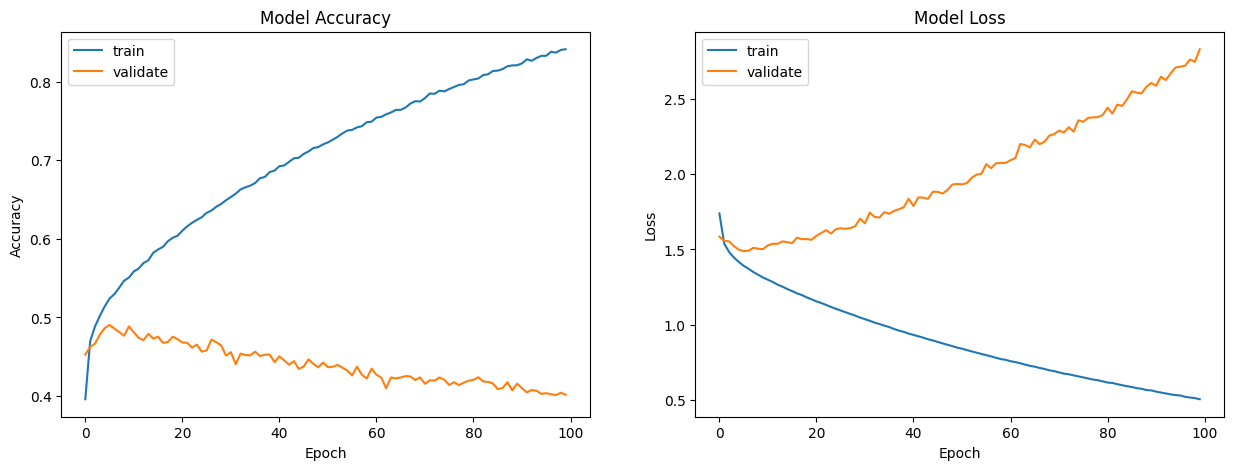

In [ ]:
plotmodelhistory(history)

In [ ]:
# min validation loss over 100 epochs
print(np.argmin(history.history['val_loss']))

5


In [ ]:
loss, acc = model.evaluate(x_test, prep_encoder(y_test), verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {acc}')

313/313 [==============================] - 3s 11ms/step - loss: 2.7673 - accuracy: 0.4013
Test loss: 2.767338514328003
Test accuracy: 0.40130001306533813


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 2s 6ms/step


Number of incorrect predictions: 5987/10000
Prediction accuracy: 0.4013
10 sample count


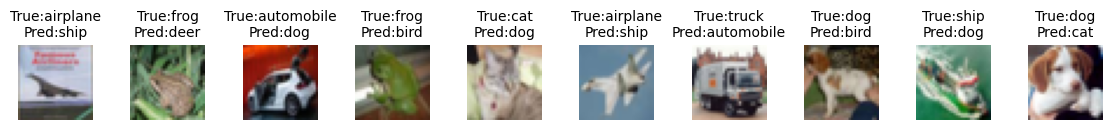

In [ ]:
errors = np.sum(y_pred != y_test)
errors_index = np.where(y_pred != y_test)[0]
test_samples = len(y_pred)

print(f'Number of incorrect predictions: {errors}/{test_samples}')
print(f'Prediction accuracy: {1-errors/test_samples}')

show_multi(X_test[errors_index][:10], y_test[errors_index][:10].ravel(), y_pred[errors_index][:10])

convolutional architecture

In [13]:
def conv2d_model(blocks=1, dropout=False, optimizer='rmsprop'):
    model = models.Sequential()

    # block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    if dropout:
        model.add(layers.Dropout(0.25))

    # block 2
    if blocks>1:
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        if dropout:
            model.add(layers.Dropout(0.25))

    # head
    model.add(layers.Flatten())
    model.add(layers.Dense(64 * blocks, activation='relu'))
    if dropout:
        model.add(layers.Dropout(0.25))
    model.add(layers.Dense(10, activation='softmax'))
    
    # hyperparameters
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

# model_c = conv2d_model(blocks=2, dropout=True)
# model_c.summary()

In [20]:
model_a = conv2d_model(blocks=1)
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                401472    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                      

In [21]:
N_EPOCHS = 100
BATCH_SIZE = 64


history_a = model_a.fit(x_partial, y_partial,
                      validation_data=(x_val, y_val),
                      epochs=N_EPOCHS, batch_size=BATCH_SIZE,
                      verbose=1)

Epoch 1/100
625/625 [==============================] - 15s 23ms/step - loss: 1.5375 - accuracy: 0.4520 - val_loss: 1.2517 - val_accuracy: 0.5494
Epoch 2/100
625/625 [==============================] - 14s 23ms/step - loss: 1.1499 - accuracy: 0.5994 - val_loss: 1.2246 - val_accuracy: 0.5716
Epoch 3/100
625/625 [==============================] - 14s 23ms/step - loss: 0.9875 - accuracy: 0.6584 - val_loss: 1.0370 - val_accuracy: 0.6434
Epoch 4/100
625/625 [==============================] - 13s 20ms/step - loss: 0.8695 - accuracy: 0.6998 - val_loss: 1.0173 - val_accuracy: 0.6539
Epoch 5/100
625/625 [==============================] - 14s 23ms/step - loss: 0.7732 - accuracy: 0.7322 - val_loss: 0.9902 - val_accuracy: 0.6715
Epoch 6/100
625/625 [==============================] - 14s 23ms/step - loss: 0.6869 - accuracy: 0.7639 - val_loss: 1.0429 - val_accuracy: 0.6541
Epoch 7/100
625/625 [==============================] - 14s 23ms/step - loss: 0.6012 - accuracy: 0.7926 - val_loss: 1.0449 - val_ac

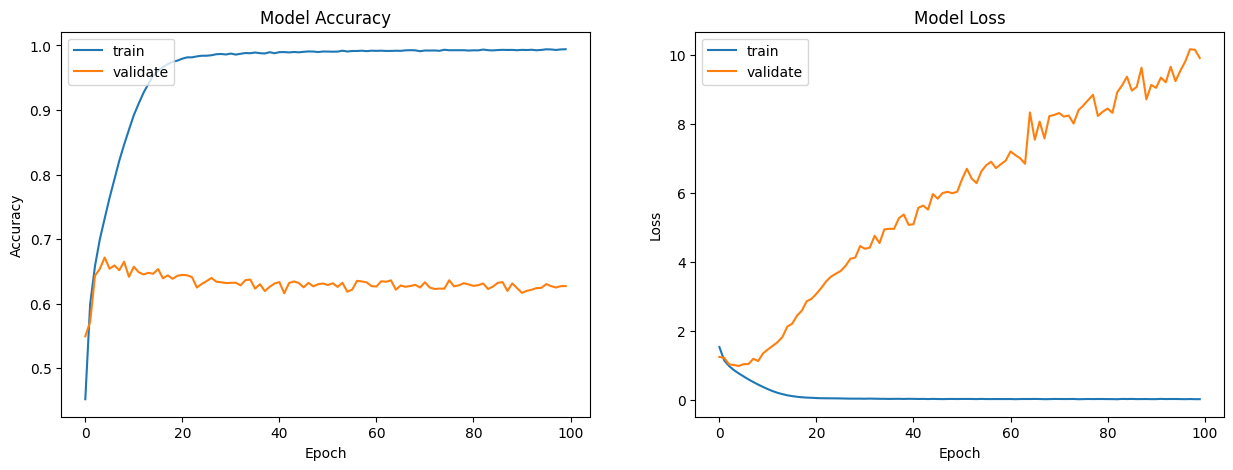

In [22]:
plotmodelhistory(history_a)

In [23]:
print(np.argmin(history_a.history['val_loss']))

4


In [24]:
loss, acc = model_a.evaluate(x_test, prep_encoder(y_test), verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {acc}')

313/313 [==============================] - 3s 9ms/step - loss: 9.9857 - accuracy: 0.6208
Test loss: 9.985657691955566
Test accuracy: 0.6208000183105469


In [25]:
model_b = conv2d_model(blocks=2)
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [26]:
N_EPOCHS = 100
BATCH_SIZE = 64


history_b = model_b.fit(x_partial, y_partial,
                      validation_data=(x_val, y_val),
                      epochs=N_EPOCHS, batch_size=BATCH_SIZE,
                      verbose=1)

Epoch 1/100
625/625 [==============================] - 20s 29ms/step - loss: 1.6547 - accuracy: 0.4027 - val_loss: 1.3382 - val_accuracy: 0.5157
Epoch 2/100
625/625 [==============================] - 18s 29ms/step - loss: 1.2154 - accuracy: 0.5700 - val_loss: 1.1005 - val_accuracy: 0.6178
Epoch 3/100
625/625 [==============================] - 18s 29ms/step - loss: 0.9928 - accuracy: 0.6536 - val_loss: 0.9609 - val_accuracy: 0.6661
Epoch 4/100
625/625 [==============================] - 18s 29ms/step - loss: 0.8467 - accuracy: 0.7054 - val_loss: 0.9174 - val_accuracy: 0.6812
Epoch 5/100
625/625 [==============================] - 18s 29ms/step - loss: 0.7340 - accuracy: 0.7443 - val_loss: 0.7970 - val_accuracy: 0.7298
Epoch 6/100
625/625 [==============================] - 18s 29ms/step - loss: 0.6438 - accuracy: 0.7750 - val_loss: 0.7969 - val_accuracy: 0.7339
Epoch 7/100
625/625 [==============================] - 18s 29ms/step - loss: 0.5626 - accuracy: 0.8033 - val_loss: 0.7643 - val_ac

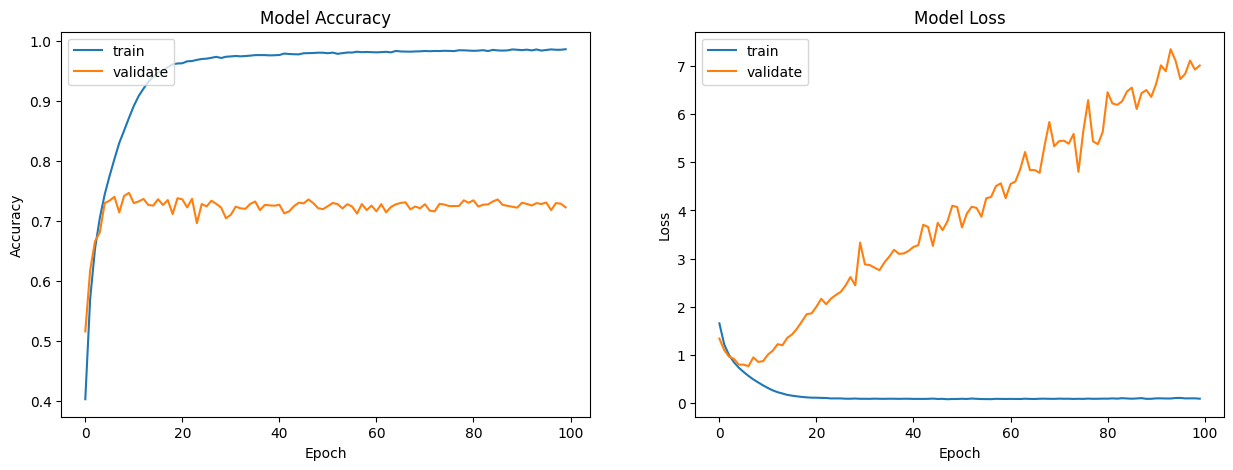

In [27]:
plotmodelhistory(history_b)

In [28]:
print(np.argmin(history_b.history['val_loss']))

6


In [29]:
loss, acc = model_b.evaluate(x_test, prep_encoder(y_test), verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {acc}')

313/313 [==============================] - 4s 12ms/step - loss: 7.1817 - accuracy: 0.7177
Test loss: 7.181719779968262
Test accuracy: 0.7177000045776367


In [16]:
model_c = conv2d_model(blocks=2, dropout=True)
model_c.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [17]:
N_EPOCHS = 100
BATCH_SIZE = 128


history_c = model_c.fit(x_partial, y_partial,
                      validation_data=(x_val, y_val),
                      epochs=N_EPOCHS, batch_size=BATCH_SIZE,
                      verbose=1)

Epoch 1/100
313/313 [==============================] - 11s 32ms/step - loss: 1.9009 - accuracy: 0.3094 - val_loss: 1.7538 - val_accuracy: 0.3456
Epoch 2/100
313/313 [==============================] - 9s 30ms/step - loss: 1.5138 - accuracy: 0.4608 - val_loss: 1.2937 - val_accuracy: 0.5355
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 1.3075 - accuracy: 0.5369 - val_loss: 1.2004 - val_accuracy: 0.5713
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 1.1683 - accuracy: 0.5885 - val_loss: 1.0347 - val_accuracy: 0.6317
Epoch 5/100
313/313 [==============================] - 10s 31ms/step - loss: 1.0564 - accuracy: 0.6303 - val_loss: 0.9819 - val_accuracy: 0.6478
Epoch 6/100
313/313 [==============================] - 10s 32ms/step - loss: 0.9702 - accuracy: 0.6609 - val_loss: 0.9818 - val_accuracy: 0.6636
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.9084 - accuracy: 0.6857 - val_loss: 0.9402 - val_acc

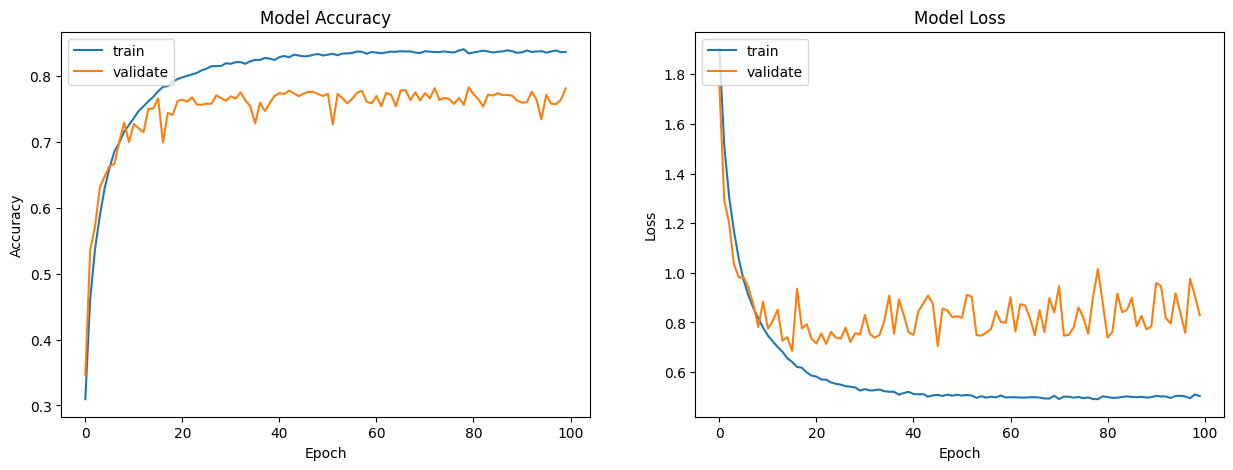

In [18]:
plotmodelhistory(history_c)

In [19]:
print(np.argmin(history_c.history['val_loss']))

15


In [20]:
loss, acc = model_c.evaluate(x_test, prep_encoder(y_test), verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {acc}')

313/313 [==============================] - 3s 10ms/step - loss: 0.8330 - accuracy: 0.7782
Test loss: 0.8329537510871887
Test accuracy: 0.7782000303268433


In [41]:
model_d = conv2d_model(blocks=2, dropout=True, optimizer='adam')
model_d.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

In [42]:
N_EPOCHS = 100
BATCH_SIZE = 128


history_d = model_d.fit(x_partial, y_partial,
                      validation_data=(x_val, y_val),
                      epochs=N_EPOCHS, batch_size=BATCH_SIZE,
                      verbose=1)

Epoch 1/100
313/313 [==============================] - 12s 34ms/step - loss: 1.7259 - accuracy: 0.3633 - val_loss: 1.4197 - val_accuracy: 0.4849
Epoch 2/100
313/313 [==============================] - 8s 27ms/step - loss: 1.3726 - accuracy: 0.5046 - val_loss: 1.2258 - val_accuracy: 0.5659
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 1.2261 - accuracy: 0.5625 - val_loss: 1.1607 - val_accuracy: 0.5887
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 1.1117 - accuracy: 0.6067 - val_loss: 0.9955 - val_accuracy: 0.6491
Epoch 5/100
313/313 [==============================] - 8s 27ms/step - loss: 1.0196 - accuracy: 0.6399 - val_loss: 0.9400 - val_accuracy: 0.6670
Epoch 6/100
313/313 [==============================] - 8s 26ms/step - loss: 0.9579 - accuracy: 0.6621 - val_loss: 0.9440 - val_accuracy: 0.6686
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.9049 - accuracy: 0.6820 - val_loss: 0.8412 - val_accuracy

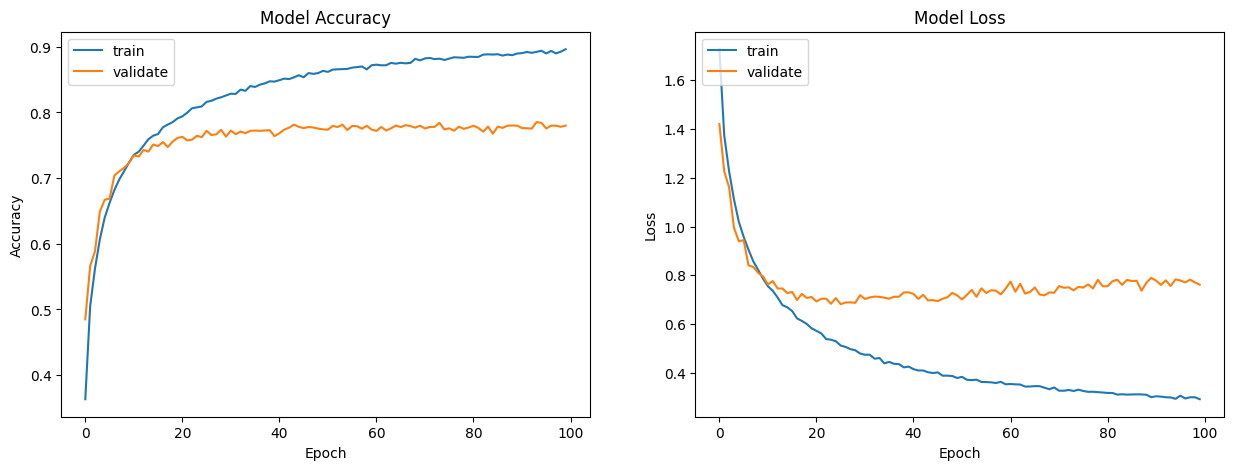

In [43]:
plotmodelhistory(history_d)

In [44]:
print(np.argmin(history_d.history['val_loss']))

25


In [45]:
loss, acc = model_d.evaluate(x_test, prep_encoder(y_test), verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {acc}')

313/313 [==============================] - 3s 10ms/step - loss: 0.7472 - accuracy: 0.7833
Test loss: 0.7471829056739807
Test accuracy: 0.7833000421524048


In [21]:
print(history_d.history)

NameError: name 'history_d' is not defined

In [14]:
def conv2d_model2(blocks=1, dropout=False, optimizer='rmsprop', regularizer=None):
    model = models.Sequential()

    # block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train[0].shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    if dropout:
        model.add(layers.Dropout(0.25))

    # block 2
    if blocks>1:
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        if dropout:
            model.add(layers.Dropout(0.25))

    # block 3
    if blocks>2:
        model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(128, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        if dropout:
            model.add(layers.Dropout(0.25))

    # head
    model.add(layers.Flatten())
    if regularizer:
        model.add(layers.Dense(64 * np.power(2,blocks-1),kernel_regularizer=regularizer, activation='relu'))
    else:
        model.add(layers.Dense(64 * np.power(2,blocks-1), activation='relu'))
    if dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    # hyperparameters
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

In [12]:
model_e = conv2d_model2(blocks=3, dropout=True, optimizer='adam')
model_e.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [18]:
N_EPOCHS = 100
BATCH_SIZE = 128


history_e = model_e.fit(x_partial, y_partial,
                      validation_data=(x_val, y_val),
                      epochs=N_EPOCHS, batch_size=BATCH_SIZE,
                      verbose=1)

Epoch 1/100
313/313 [==============================] - 6s 17ms/step - loss: 1.8880 - accuracy: 0.2870 - val_loss: 1.5062 - val_accuracy: 0.4427
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 1.4344 - accuracy: 0.4768 - val_loss: 1.2143 - val_accuracy: 0.5590
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 1.2246 - accuracy: 0.5605 - val_loss: 1.0557 - val_accuracy: 0.6197
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 1.1009 - accuracy: 0.6063 - val_loss: 1.0052 - val_accuracy: 0.6403
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 1.0003 - accuracy: 0.6473 - val_loss: 0.8915 - val_accuracy: 0.6856
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.9322 - accuracy: 0.6706 - val_loss: 0.8451 - val_accuracy: 0.6976
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.8696 - accuracy: 0.6955 - val_loss: 0.8572 - val_accuracy:

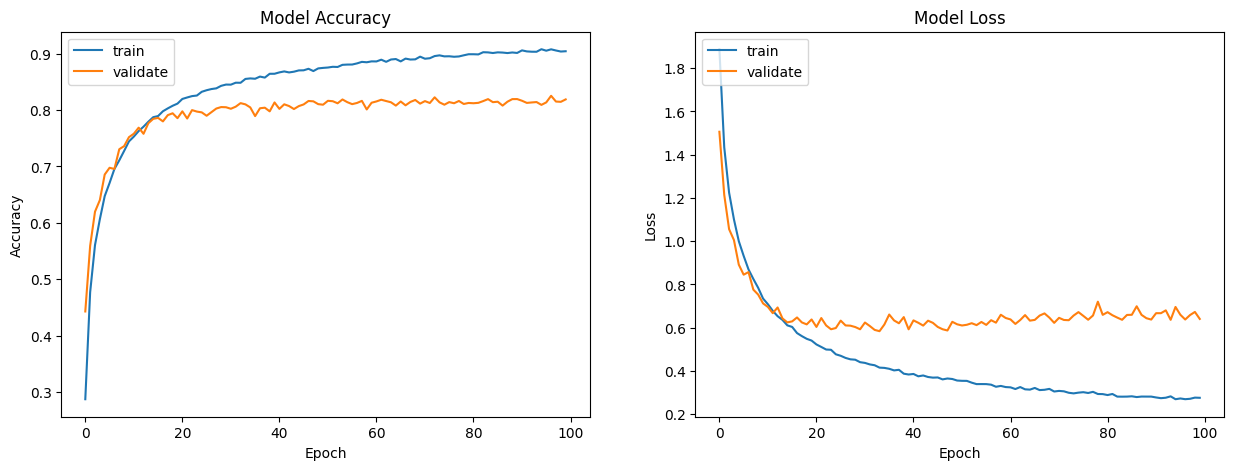

In [21]:
plotmodelhistory(history_e)

In [22]:
print(np.argmin(history_e.history['val_loss']))
loss, acc = model_e.evaluate(x_test, prep_encoder(y_test), verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {acc}')

33
313/313 [==============================] - 1s 4ms/step - loss: 0.6710 - accuracy: 0.8134
Test loss: 0.6710217595100403
Test accuracy: 0.8134000301361084


In [15]:
regularizer=regularizers.l2(0.001)

model_f = conv2d_model2(blocks=3, dropout=True, optimizer='adam', regularizer=regularizer)
model_f.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

In [14]:
N_EPOCHS = 100
BATCH_SIZE = 128


history_f = model_f.fit(x_partial, y_partial,
                      validation_data=(x_val, y_val),
                      epochs=N_EPOCHS, batch_size=BATCH_SIZE,
                      verbose=1)

Epoch 1/100
313/313 [==============================] - 10s 28ms/step - loss: 1.9415 - accuracy: 0.3011 - val_loss: 1.5405 - val_accuracy: 0.4450
Epoch 2/100
313/313 [==============================] - 8s 27ms/step - loss: 1.4538 - accuracy: 0.4876 - val_loss: 1.3098 - val_accuracy: 0.5445
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 1.2670 - accuracy: 0.5606 - val_loss: 1.1540 - val_accuracy: 0.5933
Epoch 4/100
313/313 [==============================] - 8s 27ms/step - loss: 1.1388 - accuracy: 0.6116 - val_loss: 1.0183 - val_accuracy: 0.6537
Epoch 5/100
313/313 [==============================] - 8s 26ms/step - loss: 1.0297 - accuracy: 0.6535 - val_loss: 0.9178 - val_accuracy: 0.6904
Epoch 6/100
313/313 [==============================] - 8s 26ms/step - loss: 0.9516 - accuracy: 0.6847 - val_loss: 0.8710 - val_accuracy: 0.7096
Epoch 7/100
313/313 [==============================] - 9s 28ms/step - loss: 0.8961 - accuracy: 0.7029 - val_loss: 0.8007 - val_accuracy

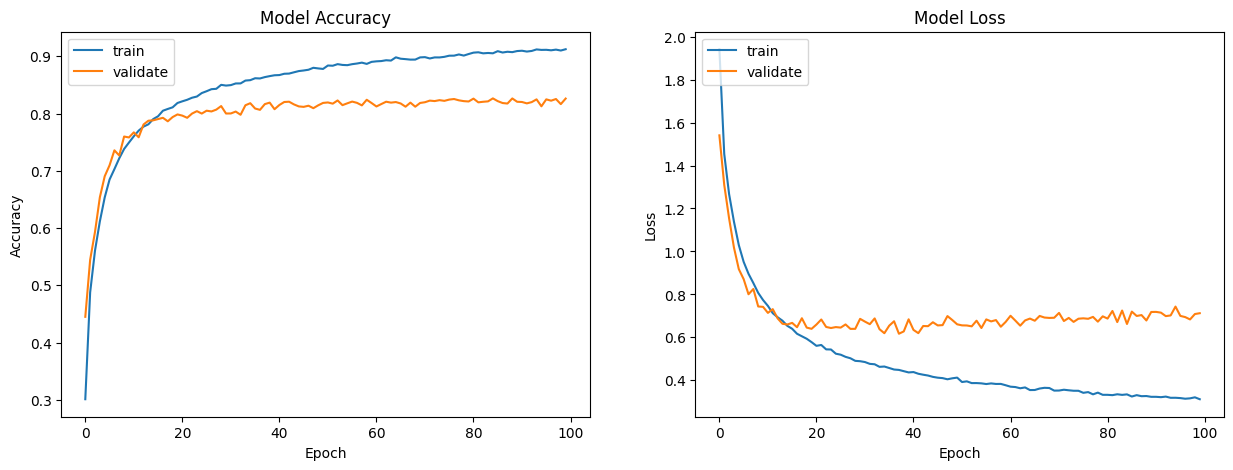

In [17]:
plotmodelhistory(history_f)

In [18]:
print(np.argmin(history_f.history['val_loss']))
loss, acc = model_f.evaluate(x_test, prep_encoder(y_test), verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {acc}')

37
313/313 [==============================] - 3s 8ms/step - loss: 0.7278 - accuracy: 0.8289
Test loss: 0.7278416752815247
Test accuracy: 0.8289000391960144


In [16]:
N_EPOCHS = 100
BATCH_SIZE = 256


history_g = model_f.fit(x_partial, y_partial,
                      validation_data=(x_val, y_val),
                      epochs=N_EPOCHS, batch_size=BATCH_SIZE,
                      verbose=1)

Epoch 1/100
157/157 [==============================] - 6s 33ms/step - loss: 2.1562 - accuracy: 0.2296 - val_loss: 1.8189 - val_accuracy: 0.3416
Epoch 2/100
157/157 [==============================] - 5s 30ms/step - loss: 1.6377 - accuracy: 0.4103 - val_loss: 1.4659 - val_accuracy: 0.4765
Epoch 3/100
157/157 [==============================] - 5s 30ms/step - loss: 1.4054 - accuracy: 0.5038 - val_loss: 1.3122 - val_accuracy: 0.5472
Epoch 4/100
157/157 [==============================] - 5s 31ms/step - loss: 1.2556 - accuracy: 0.5631 - val_loss: 1.1433 - val_accuracy: 0.6025
Epoch 5/100
157/157 [==============================] - 5s 31ms/step - loss: 1.1514 - accuracy: 0.6056 - val_loss: 1.0900 - val_accuracy: 0.6236
Epoch 6/100
157/157 [==============================] - 5s 30ms/step - loss: 1.0630 - accuracy: 0.6370 - val_loss: 0.9975 - val_accuracy: 0.6650
Epoch 7/100
157/157 [==============================] - 5s 31ms/step - loss: 0.9976 - accuracy: 0.6636 - val_loss: 0.9125 - val_accuracy:

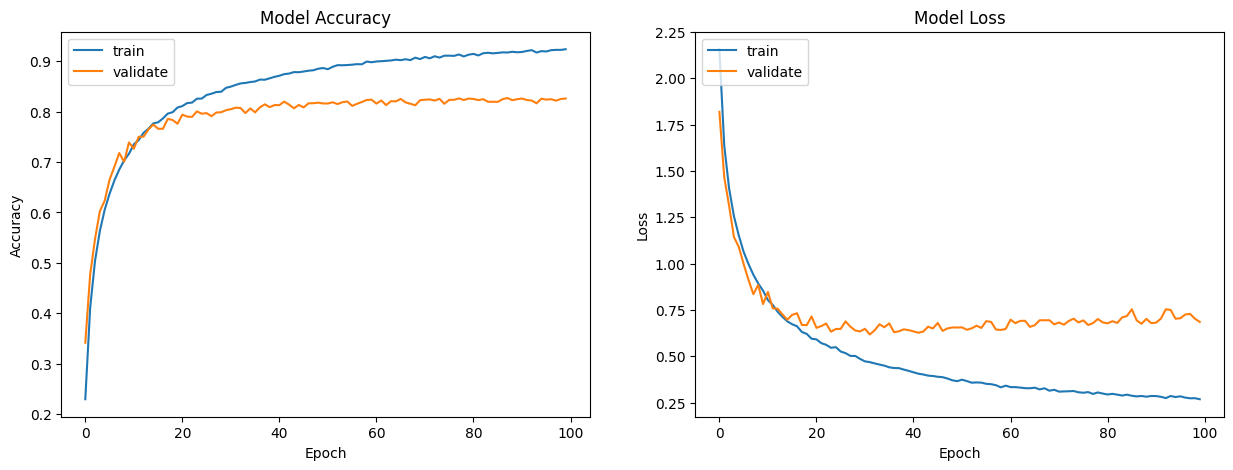

31


In [17]:
plotmodelhistory(history_g)
print(np.argmin(history_g.history['val_loss']))


In [16]:
N_EPOCHS = 100
BATCH_SIZE = 512


history_h = model_f.fit(x_partial, y_partial,
                      validation_data=(x_val, y_val),
                      epochs=N_EPOCHS, batch_size=BATCH_SIZE,
                      verbose=1)

Epoch 1/100
79/79 [==============================] - 6s 57ms/step - loss: 2.2506 - accuracy: 0.2077 - val_loss: 1.8910 - val_accuracy: 0.3158
Epoch 2/100
79/79 [==============================] - 3s 44ms/step - loss: 1.7922 - accuracy: 0.3606 - val_loss: 1.5874 - val_accuracy: 0.4361
Epoch 3/100
79/79 [==============================] - 4s 45ms/step - loss: 1.5804 - accuracy: 0.4353 - val_loss: 1.4566 - val_accuracy: 0.4823
Epoch 4/100
79/79 [==============================] - 4s 48ms/step - loss: 1.4465 - accuracy: 0.4865 - val_loss: 1.3603 - val_accuracy: 0.5182
Epoch 5/100
79/79 [==============================] - 4s 45ms/step - loss: 1.3377 - accuracy: 0.5350 - val_loss: 1.3891 - val_accuracy: 0.5226
Epoch 6/100
79/79 [==============================] - 3s 44ms/step - loss: 1.2615 - accuracy: 0.5642 - val_loss: 1.1486 - val_accuracy: 0.6052
Epoch 7/100
79/79 [==============================] - 4s 45ms/step - loss: 1.1882 - accuracy: 0.5898 - val_loss: 1.1068 - val_accuracy: 0.6160
Epoch 

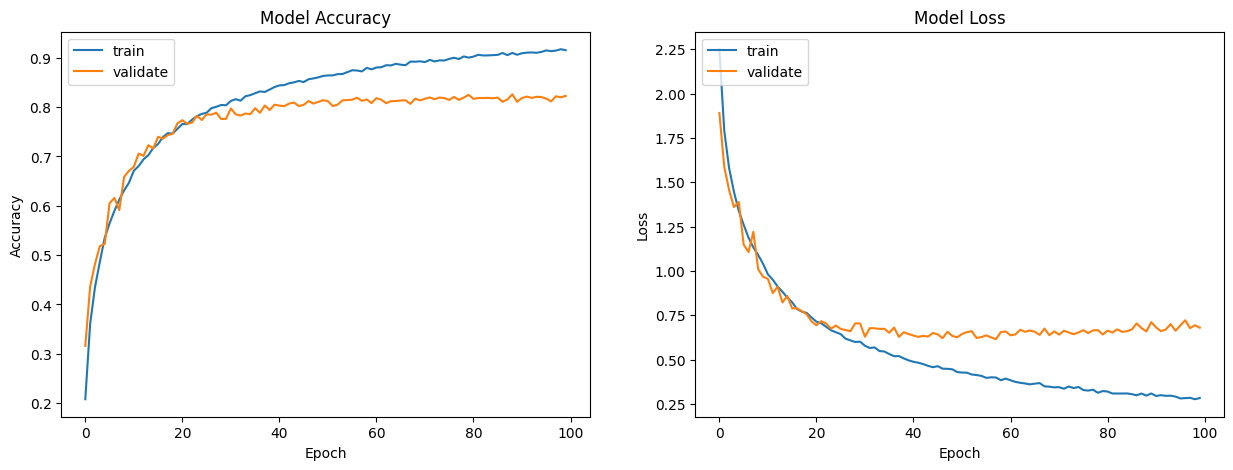

57


In [17]:
plotmodelhistory(history_h)
print(np.argmin(history_h.history['val_loss']))

In [214]:
def conv2d_model3(blocks=1, dropout=None, optimizer='rmsprop', regularizer=None):
    model = models.Sequential()

    # block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer, input_shape=X_train[0].shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    if dropout: model.add(layers.Dropout(dropout))

    # block 2
    if blocks>1:
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        if dropout: model.add(layers.Dropout(dropout))

    # block 3
    if blocks>2:
        model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
        model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizer))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        if dropout: model.add(layers.Dropout(dropout))

    # head
    model.add(layers.Flatten())
    model.add(layers.Dense(64 * np.power(2,blocks-1), activation='relu',kernel_regularizer=regularizer))
    if dropout: model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    # hyperparameter functions
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

In [215]:
regularizer = regularizers.l2(0.0001)
optimizer = optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model_i = conv2d_model3(blocks=3, dropout=0.5, optimizer=optimizer, regularizer=regularizer)
model_i.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_244 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_245 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_122 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_157 (Dropout)       (None, 16, 16, 32)        0         
                                                                 
 conv2d_246 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_247 (Conv2D)         (None, 16, 16, 64)        36928     
                                                     

In [216]:
N_EPOCHS = 100
BATCH_SIZE = 128


history_i = model_i.fit(x_partial, y_partial,
                      validation_data=(x_val, y_val),
                      epochs=N_EPOCHS, batch_size=BATCH_SIZE,
                      verbose=1)

Epoch 1/100
625/625 [==============================] - 71s 103ms/step - loss: 2.2367 - accuracy: 0.1827 - val_loss: 2.0091 - val_accuracy: 0.3333
Epoch 2/100
625/625 [==============================] - 71s 114ms/step - loss: 1.9183 - accuracy: 0.3193 - val_loss: 1.7925 - val_accuracy: 0.3736
Epoch 3/100
625/625 [==============================] - 40s 64ms/step - loss: 1.7932 - accuracy: 0.3631 - val_loss: 1.6974 - val_accuracy: 0.4085
Epoch 4/100
625/625 [==============================] - 38s 60ms/step - loss: 1.7003 - accuracy: 0.3995 - val_loss: 1.6001 - val_accuracy: 0.4369
Epoch 5/100
625/625 [==============================] - 36s 58ms/step - loss: 1.6197 - accuracy: 0.4327 - val_loss: 1.4967 - val_accuracy: 0.4803
Epoch 6/100
625/625 [==============================] - 34s 55ms/step - loss: 1.5606 - accuracy: 0.4533 - val_loss: 1.4955 - val_accuracy: 0.4857
Epoch 7/100
625/625 [==============================] - 37s 59ms/step - loss: 1.5030 - accuracy: 0.4774 - val_loss: 1.3917 - val_

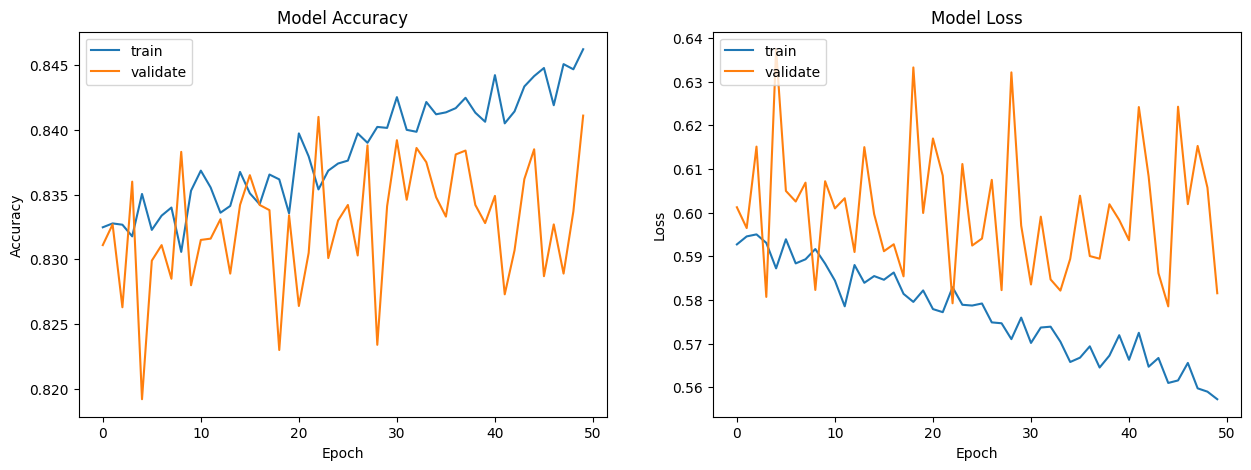

In [ ]:
plotmodelhistory(history_i)

In [ ]:
print(np.argmin(history_i.history['val_loss']))
loss, acc = model_i.evaluate(x_test, prep_encoder(y_test), verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {acc}')

44
313/313 [==============================] - 8s 26ms/step - loss: 0.5932 - accuracy: 0.8404
Test loss: 0.5931729674339294
Test accuracy: 0.8404000401496887


In [ ]:
y_pred = model_i.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 5s 16ms/step


Number of incorrect predictions: 1596/10000
Prediction accuracy: 0.8404
10 sample count


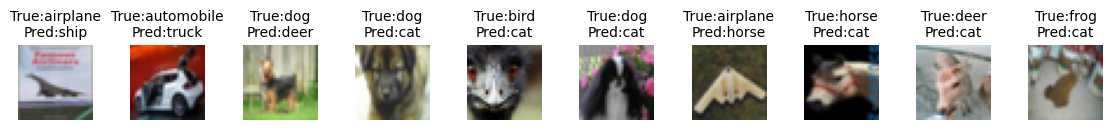

In [ ]:
errors = np.sum(y_pred != y_test)
errors_index = np.where(y_pred != y_test)[0]
test_samples = len(y_pred)

print(f'Number of incorrect predictions: {errors}/{test_samples}')
print(f'Prediction accuracy: {1-errors/test_samples}')

show_multi(X_test[errors_index][:10], y_test[errors_index][:10].ravel(), y_pred[errors_index][:10])

- l2 regularization on every layer helps validation loss, regularizer=regularizers.l2(0.001) is too high, model is underfitting
- 0.3-0.5 dropout seems to be the sweet spot
- train final model on longer epochs
- 2 vs 3 blocks
- high dropout of 0.5 produces good accuracy and low loss, perhaps due to low quality of images (batch_size=128)

 ## References
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

https://keras.io/api/layers/convolution_layers/convolution2d/

https://stackoverflow.com/questions/17888593/display-sequence-of-images-using-matplotlibmatpl

https://papers.nips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf alexnet

https://arxiv.org/pdf/1409.1556.pdf vgg16



#https://www.kaggle.com/code/roblexnana/cifar10-with-cnn-for-beginer

#https://github.com/hudsonmendes/uolondon-cm3015-mlnn/blob/main/final/report.ipynb

## 1 Define the Problem
    What is the input data?
    What type of problem? Multiclass singlelabel classification

## 2 Choosing a measure of success
    Accuracy?
    Precision and recall?

## 3 Deciding on an Evaluation Protocol
    Hold-out? Our dataset is sufficiently big and well balanced
    K-fold? 

## 4 Preparing your data
    Manipulate into tensors
    Normalize values [0, 1]
    Data visualization is not necessary

## 5 Developing a model that does better than a baseline
    Aim for statistical power
    State the common-sense baseline: 10%
    Last layer? softmax
    Loss Function? crossentropy
    Optimizer? RMSProp

## 6 Scaling up - Developing a model that overfits
    From statistical power to sufficient power
    Increase model capacity, +layers, layersize
    Monitor overfitting and validation loss and other metrics
    Demonstrate graphically and in text overfitting

## 7 Regularizing and Tuning Hyperparameters
    Dropout layers
    Different Architectures
    L1 and L2 Regularization
     Demonstrate graphically regularization and taming overfitting

#### Misc GPU Testing

In [ ]:
# native Windows tensorflow=2.10
!nvidia-smi

Tue Sep 12 00:06:35 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.13                 Driver Version: 537.13       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1080      WDDM  | 00000000:01:00.0  On |                  N/A |
| 29%   57C    P0              61W / 172W |   7936MiB /  8192MiB |    100%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Look for GPU
device_name = tf.test.gpu_device_name()
print(device_name)
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

/device:GPU:0
Found GPU at: /device:GPU:0


In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
